In [1]:
import matplotlib.pyplot as plt

# Исследование ширины интервала от размера выборки

Исследование основано на равномерном распределении на $\xi \sim [0, 1]$.
$D(\xi) = \dfrac{1}{12}$


In [4]:
import random
import numpy as np

#### Самописные функции для вычисление первого, второго момента, а также выборочной и исправленной выборочной дисперсии.
#### А также функция для генерации дисперсии (исправленной и обычной) выборки из равномерного распределения.

Возьмем доверительный интервал уровня gamma = 0.95, тогда он будет выглядеть как:
m - 2.6/sqrt(n) < x_{1/2} < m + 2.6/sqrt(n).

In [128]:
def m1(array):
    return sum(array) / len(array)
def m2(array):
    return sum(list(map(lambda x: x ** 2, array))) / len(array)
def D(array):
    return m2(array) - m1(array) ** 2
def D_corr(array):
    return len(array) / (len(array) - 1) * D(array)
def sample(size):
    array = np.random.uniform(low=0.0, high=1, size=size)
    return np.median(array)

In [189]:
x, y_left, y_right = [], [], []
weight = []
counter = 0
for n_size in range(10, 5000, 10):
    x.append(n_size)
    median = sample(n_size)
    y_l, y_r = median - 1.96/ (n_size ** 0.5 * 2), median + 1.96 / (n_size ** 0.5 * 2)
    y_left.append(y_l)
    y_right.append(y_r)
    weight.append(y_r - y_l)
    if 0.5 < y_l or 0.5 > y_r:
        counter += 1

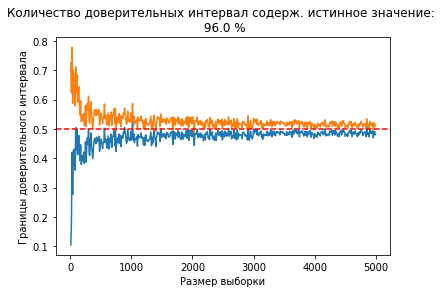

In [218]:
plt.plot(x, y_left)
plt.plot(x, y_right)
plt.axhline(y=1/2, color='r', linestyle='--')
plt.xlabel('Размер выборки')
plt.ylabel('Границы доверительного интервала');
plt.title('Количество доверительных интервал содерж. истинное значение: \n {} %'.format(round(1 - counter / len(x), 3) * 100 ));

In [222]:
y_f = list(map(lambda x: 1/(x**0.5), x))

## Ширина доверительного интервала

Из вида доверительного интервала видно, что он асимптотически эквивалентен O(1/sqrt(n)), что видно из графика ниже.

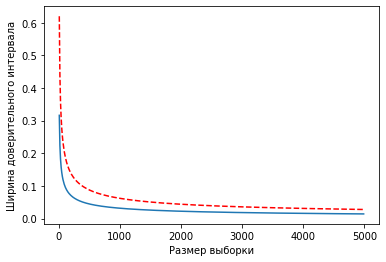

In [224]:
plt.plot(x, y_f)
plt.plot(x, weight, linestyle='--', color='r')
plt.xlabel('Размер выборки')
plt.ylabel('Ширина доверительного интервала');